# Importing Functions and Determining Two Models to Compare

In [1]:
from utils_wilcoxon_test import ExperimentAnalyzer

In [3]:
import os

run_a_folder_name = "HYBRID-TOFS-NEX-ALLFL-COLBERT_NE_TD_BM25-EMBEDDINGS-COLBERT-TUNED-WRRF"
run_b_folder_name = "HYBRID-TOFS-SMS-2-ALLFL-COLBERT_NE_TD_BM25-EMBEDDINGS-COLBERT-TUNED-WRRF"

analyzer = ExperimentAnalyzer(base_runs_path=os.path.abspath(os.path.join(".", '..', '..', 'all_runs')))

data_a = analyzer.load_run(run_a_folder_name)
data_b = analyzer.load_run(run_b_folder_name)

-> Loaded 30 seed files from HYBRID-TOFS-NEX-ALLFL-COLBERT_NE_TD_BM25-EMBEDDINGS-COLBERT-TUNED-WRRF
-> Loaded 30 seed files from HYBRID-TOFS-SMS-2-ALLFL-COLBERT_NE_TD_BM25-EMBEDDINGS-COLBERT-TUNED-WRRF


# 1. Global Performance Analysis (All Topics Averaged)

This analysis compares the overall robustness of the two models across the 30 random training sets.

- **Statistical Significance:** Checks if the global improvement is real (p<0.05).
- **Win/Loss Record:** Shows how often the model "won" across the 30 seeds.
- **Distribution (Histogram):** Visualizes if the gains are consistent (shifted curve) or driven by outliers.
- **Influential Seeds:** The "Signed Rank Table" identifies which specific random seeds caused the biggest changes in performance.


🧪 --- ANALYSIS: Global Average (All Topics) ---
Sample Size: 30
Mean No Exp: 0.2102 | Wins: 12
Mean SMS Exp: 0.2141 | Wins: 18
Wilcoxon p-value: 0.03098
✅ SIGNIFICANT: SMS Exp is better.


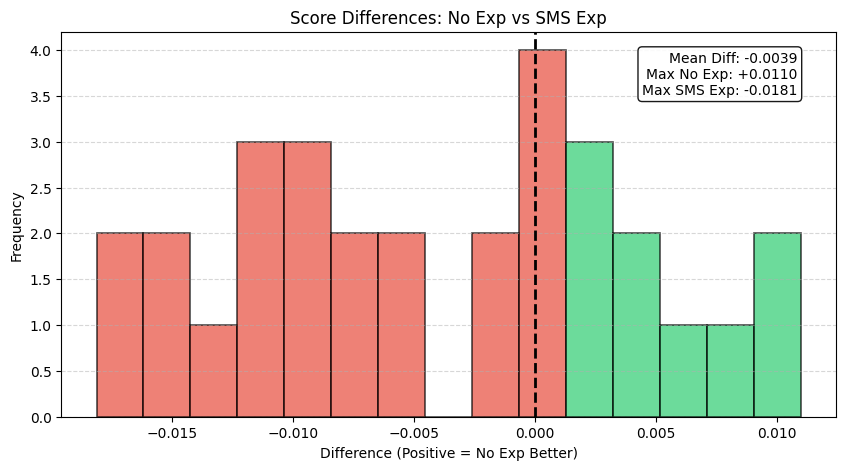


📊 --- RANK BREAKDOWN (Global Average (All Topics)) (Top 10) ---
Rows are sorted by 'Rank' (Magnitude of difference).
Green = No Exp won | Red = SMS Exp won


,Seed,Score_A,Score_B,Diff,Rank,Signed_Rank
0,Random99009_TopicsFolderMetrics.json,0.1916,0.2097,-0.0181,30.0,-30.000000
1,Random91823_TopicsFolderMetrics.json,0.2442,0.2607,-0.0165,29.0,-29.000000
2,Random777_TopicsFolderMetrics.json,0.2045,0.2197,-0.0152,28.0,-28.000000
3,Random6159_TopicsFolderMetrics.json,0.2821,0.2973,-0.0152,27.0,-27.000000
4,Random81236_TopicsFolderMetrics.json,0.2042,0.2167,-0.0125,26.0,-26.000000
5,Random62537_TopicsFolderMetrics.json,0.2017,0.2132,-0.0116,25.0,-25.000000
6,Random19865_TopicsFolderMetrics.json,0.2089,0.2203,-0.0114,24.0,-24.000000
7,Random12052025_TopicsFolderMetrics.json,0.1918,0.1808,+0.0110,23.0,23.000000
8,Random300_TopicsFolderMetrics.json,0.1731,0.1837,-0.0106,22.0,-22.000000
9,Random53819_TopicsFolderMetrics.json,0.1691,0.1791,-0.0100,21.0,-21.000000


In [4]:
analyzer.compare(data_a, data_b, "No Exp", "SMS Exp", topic_id=None, show_table=True)

# 2. Significant Topics Scan (Per-Topic Analysis)

This step scans every individual topic to find where the models differ statistically.

- **Filter by Significance:** It automatically lists only the topics where the difference between models is statistically significant (p < 0.05).
- **Identify Winners/Losers:** Shows the mean difference for each significant topic.

In [6]:
analyzer.scan_significant_topics(data_a, data_b, "No Exp", "SMS Exp")

🔎 Scanning 45 topics...


,Topic,Winner,p-value,Diff
0,T18Eval-00033,SMS Exp,0.00064,-0.0103
1,T18Eval-00001,SMS Exp,0.00072,-0.0528
2,T18Eval-00012,SMS Exp,0.01077,-0.0709
3,T18Eval-00008,No Exp,0.04580,+0.0230


## 2.1. Single Topic Analysis

Once identifying an interesting topic from the scan above, use this step to drill down into its stability.

- **Micro-Level Robustness:** Verifies if the improvement for this specific query holds true across different variations of the training set.
- **Seed Inspection:** The detailed rank table shows exactly which training set configurations (Seeds) helped this specific topic the most.

### 2.1.1. Ex.: Topic 1 (statistically relevant)


🧪 --- ANALYSIS: Topic T18Eval-00001 ---
Sample Size: 30
Mean No Exp: 0.5025 | Wins: 3
Mean SMS Exp: 0.5553 | Wins: 20
Wilcoxon p-value: 0.00072
✅ SIGNIFICANT: SMS Exp is better.


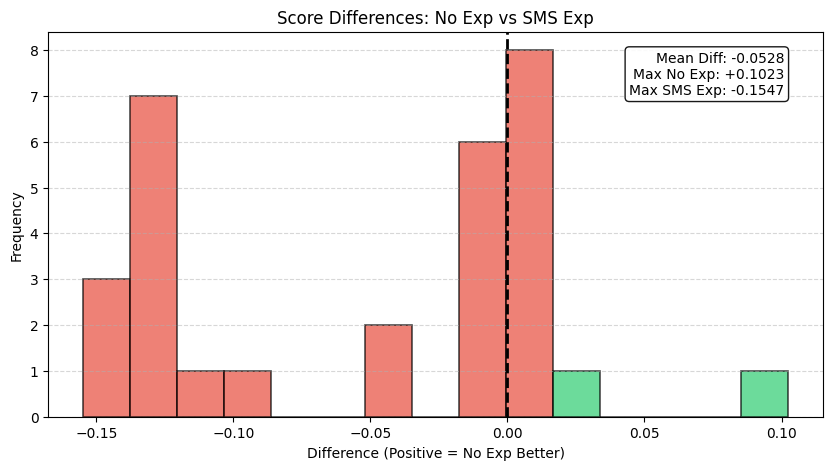


📊 --- RANK BREAKDOWN (Topic T18Eval-00001) (Top 10) ---
Rows are sorted by 'Rank' (Magnitude of difference).
Green = No Exp won | Red = SMS Exp won


,Seed,Score_A,Score_B,Diff,Rank,Signed_Rank
0,Random91823_TopicsFolderMetrics.json,0.6992,0.8539,-0.1547,30.0,-30.000000
1,Random42_TopicsFolderMetrics.json,0.3452,0.4913,-0.1461,28.5,-28.500000
2,Random120302_TopicsFolderMetrics.json,0.3452,0.4913,-0.1461,28.5,-28.500000
3,Random53819_TopicsFolderMetrics.json,0.5087,0.6399,-0.1312,25.0,-25.000000
4,Random99009_TopicsFolderMetrics.json,0.3601,0.4913,-0.1312,25.0,-25.000000
5,Random98765_TopicsFolderMetrics.json,0.3601,0.4913,-0.1312,25.0,-25.000000
6,Random98665_TopicsFolderMetrics.json,0.5531,0.6844,-0.1312,25.0,-25.000000
7,Random999_TopicsFolderMetrics.json,0.5531,0.6844,-0.1312,25.0,-25.000000
8,Random12052024_TopicsFolderMetrics.json,0.3836,0.5148,-0.1312,21.5,-21.500000
9,Random62537_TopicsFolderMetrics.json,0.3836,0.5148,-0.1312,21.5,-21.500000


In [16]:
analyzer.compare(data_a, data_b, "No Exp", "SMS Exp", topic_id="T18Eval-00001", show_table=True)

### 2.1.2. Ex.: Topic 12 (statistically relevant)


🧪 --- ANALYSIS: Topic T18Eval-00012 ---
Sample Size: 30
Mean No Exp: 0.2462 | Wins: 4
Mean SMS Exp: 0.3170 | Wins: 19
Wilcoxon p-value: 0.01077
✅ SIGNIFICANT: SMS Exp is better.


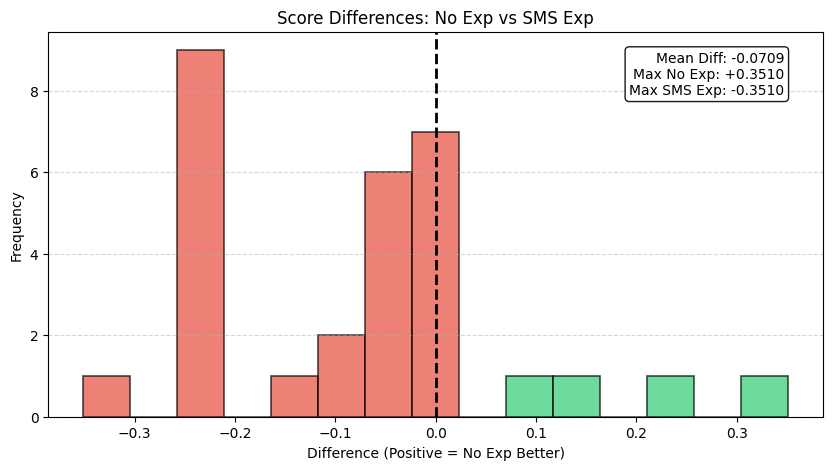


📊 --- RANK BREAKDOWN (Topic T18Eval-00012) (Top 10) ---
Rows are sorted by 'Rank' (Magnitude of difference).
Green = No Exp won | Red = SMS Exp won


,Seed,Score_A,Score_B,Diff,Rank,Signed_Rank
0,Random42_TopicsFolderMetrics.json,0.9871,0.6362,+0.3510,29.5,29.500000
1,Random98665_TopicsFolderMetrics.json,0.0717,0.4227,-0.3510,29.5,-29.500000
2,Random2025_TopicsFolderMetrics.json,0.0000,0.2396,-0.2396,25.0,-25.000000
3,Random62537_TopicsFolderMetrics.json,0.0000,0.2396,-0.2396,25.0,-25.000000
4,Random99009_TopicsFolderMetrics.json,0.0927,0.3323,-0.2396,25.0,-25.000000
5,Random91823_TopicsFolderMetrics.json,0.0000,0.2396,-0.2396,25.0,-25.000000
6,Random6159_TopicsFolderMetrics.json,0.0000,0.2396,-0.2396,25.0,-25.000000
7,Random56782_TopicsFolderMetrics.json,0.0000,0.2396,-0.2396,25.0,-25.000000
8,Random300_TopicsFolderMetrics.json,0.0000,0.2396,-0.2396,25.0,-25.000000
9,Random99000011_TopicsFolderMetrics.json,0.0799,0.3113,-0.2315,21.0,-21.000000


In [17]:
analyzer.compare(data_a, data_b, "No Exp", "SMS Exp", topic_id="T18Eval-00012", show_table=True)

### 2.1.3. Ex.: Topic 10 (not statistically relevant)


🧪 --- ANALYSIS: Topic T18Eval-00010 ---
Sample Size: 30
Mean No Exp: 0.0124 | Wins: 0
Mean SMS Exp: 0.0124 | Wins: 0
Wilcoxon p-value: nan
❌ NOT SIGNIFICANT.


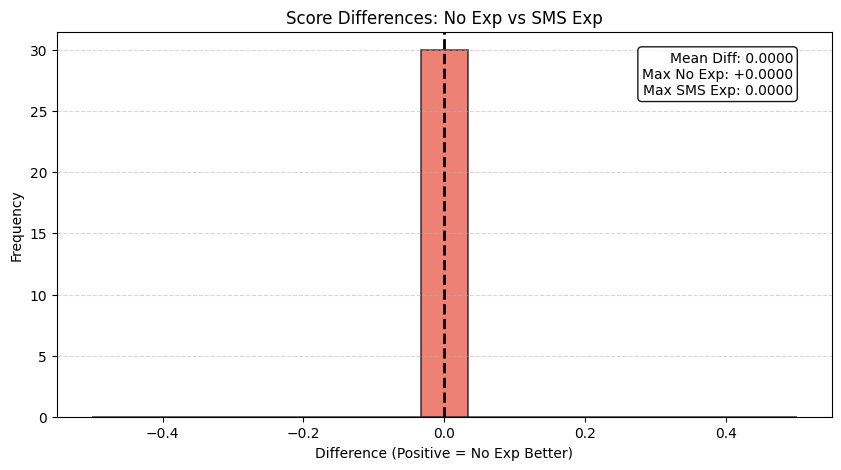


📊 --- RANK BREAKDOWN (Topic T18Eval-00010) (Top 10) ---
Rows are sorted by 'Rank' (Magnitude of difference).
Green = No Exp won | Red = SMS Exp won


,Seed,Score_A,Score_B,Diff,Rank,Signed_Rank
0,Random100_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000
1,Random120302_TopicsFolderMetrics.json,0.1854,0.1854,+0.0000,15.5,0.000000
2,Random999777333_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000
3,Random99009_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000
4,Random99000011_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000
5,Random98765_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000
6,Random98665_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000
7,Random91823_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000
8,Random81236_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000
9,Random777_TopicsFolderMetrics.json,0.0000,0.0000,+0.0000,15.5,0.000000


In [14]:
analyzer.compare(data_a, data_b, "No Exp", "SMS Exp", topic_id="T18Eval-00010", show_table=True)